In [3]:
## import the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import datetime
import missingno as msno    

1. Problem definition
2. Data collection
3. Data cleaning & Preprocessing
4. Exploratory Data Analysis
5.Model training
6. Hyperparamere tuning
7. Error analysis
8. Model evaluation

In [4]:
#import the data
train=pd.read_csv(r'C:\Users\Wambui\Desktop\Supervised_Machine_Learning\Blueberry_yield_prediction\train.csv')
test=pd.read_csv(r'C:\Users\Wambui\Desktop\Supervised_Machine_Learning\Blueberry_yield_prediction\test.csv')

In [5]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Data Cleaning & Preprocessing

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [7]:
train.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [8]:
train.columns[train.isnull().sum()>0]

Index([], dtype='object')

In [9]:
#check for duplicates
all_duplicates=train.duplicated()
print(all_duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
15284    False
15285    False
15286    False
15287    False
15288    False
Length: 15289, dtype: bool


In [10]:
#correct the inconsistencies in column names, just to make your work easier down the line
train.columns=train.columns.str.lower()

In [11]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Exploratory Data Analysis

The essence is to explore/investigate the relationship of the independent features with the dependent features, and the relationship of the independent features amongst themselves.

1. Univariate Analysis
2. Bivariate Analysis
3. Multivalriate Analysis

## Univariate Analysis

What is the distribution of yield in the dataset?

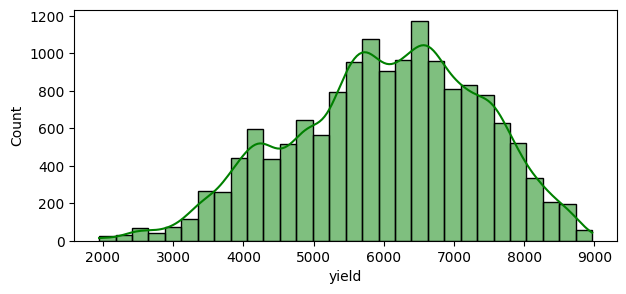

In [12]:
plt.figure(figsize=(7,3))

sns.histplot(train['yield'],kde=True,bins=30,color='green')



plt.show()

In [13]:
train.drop('id',axis=1,inplace=True)

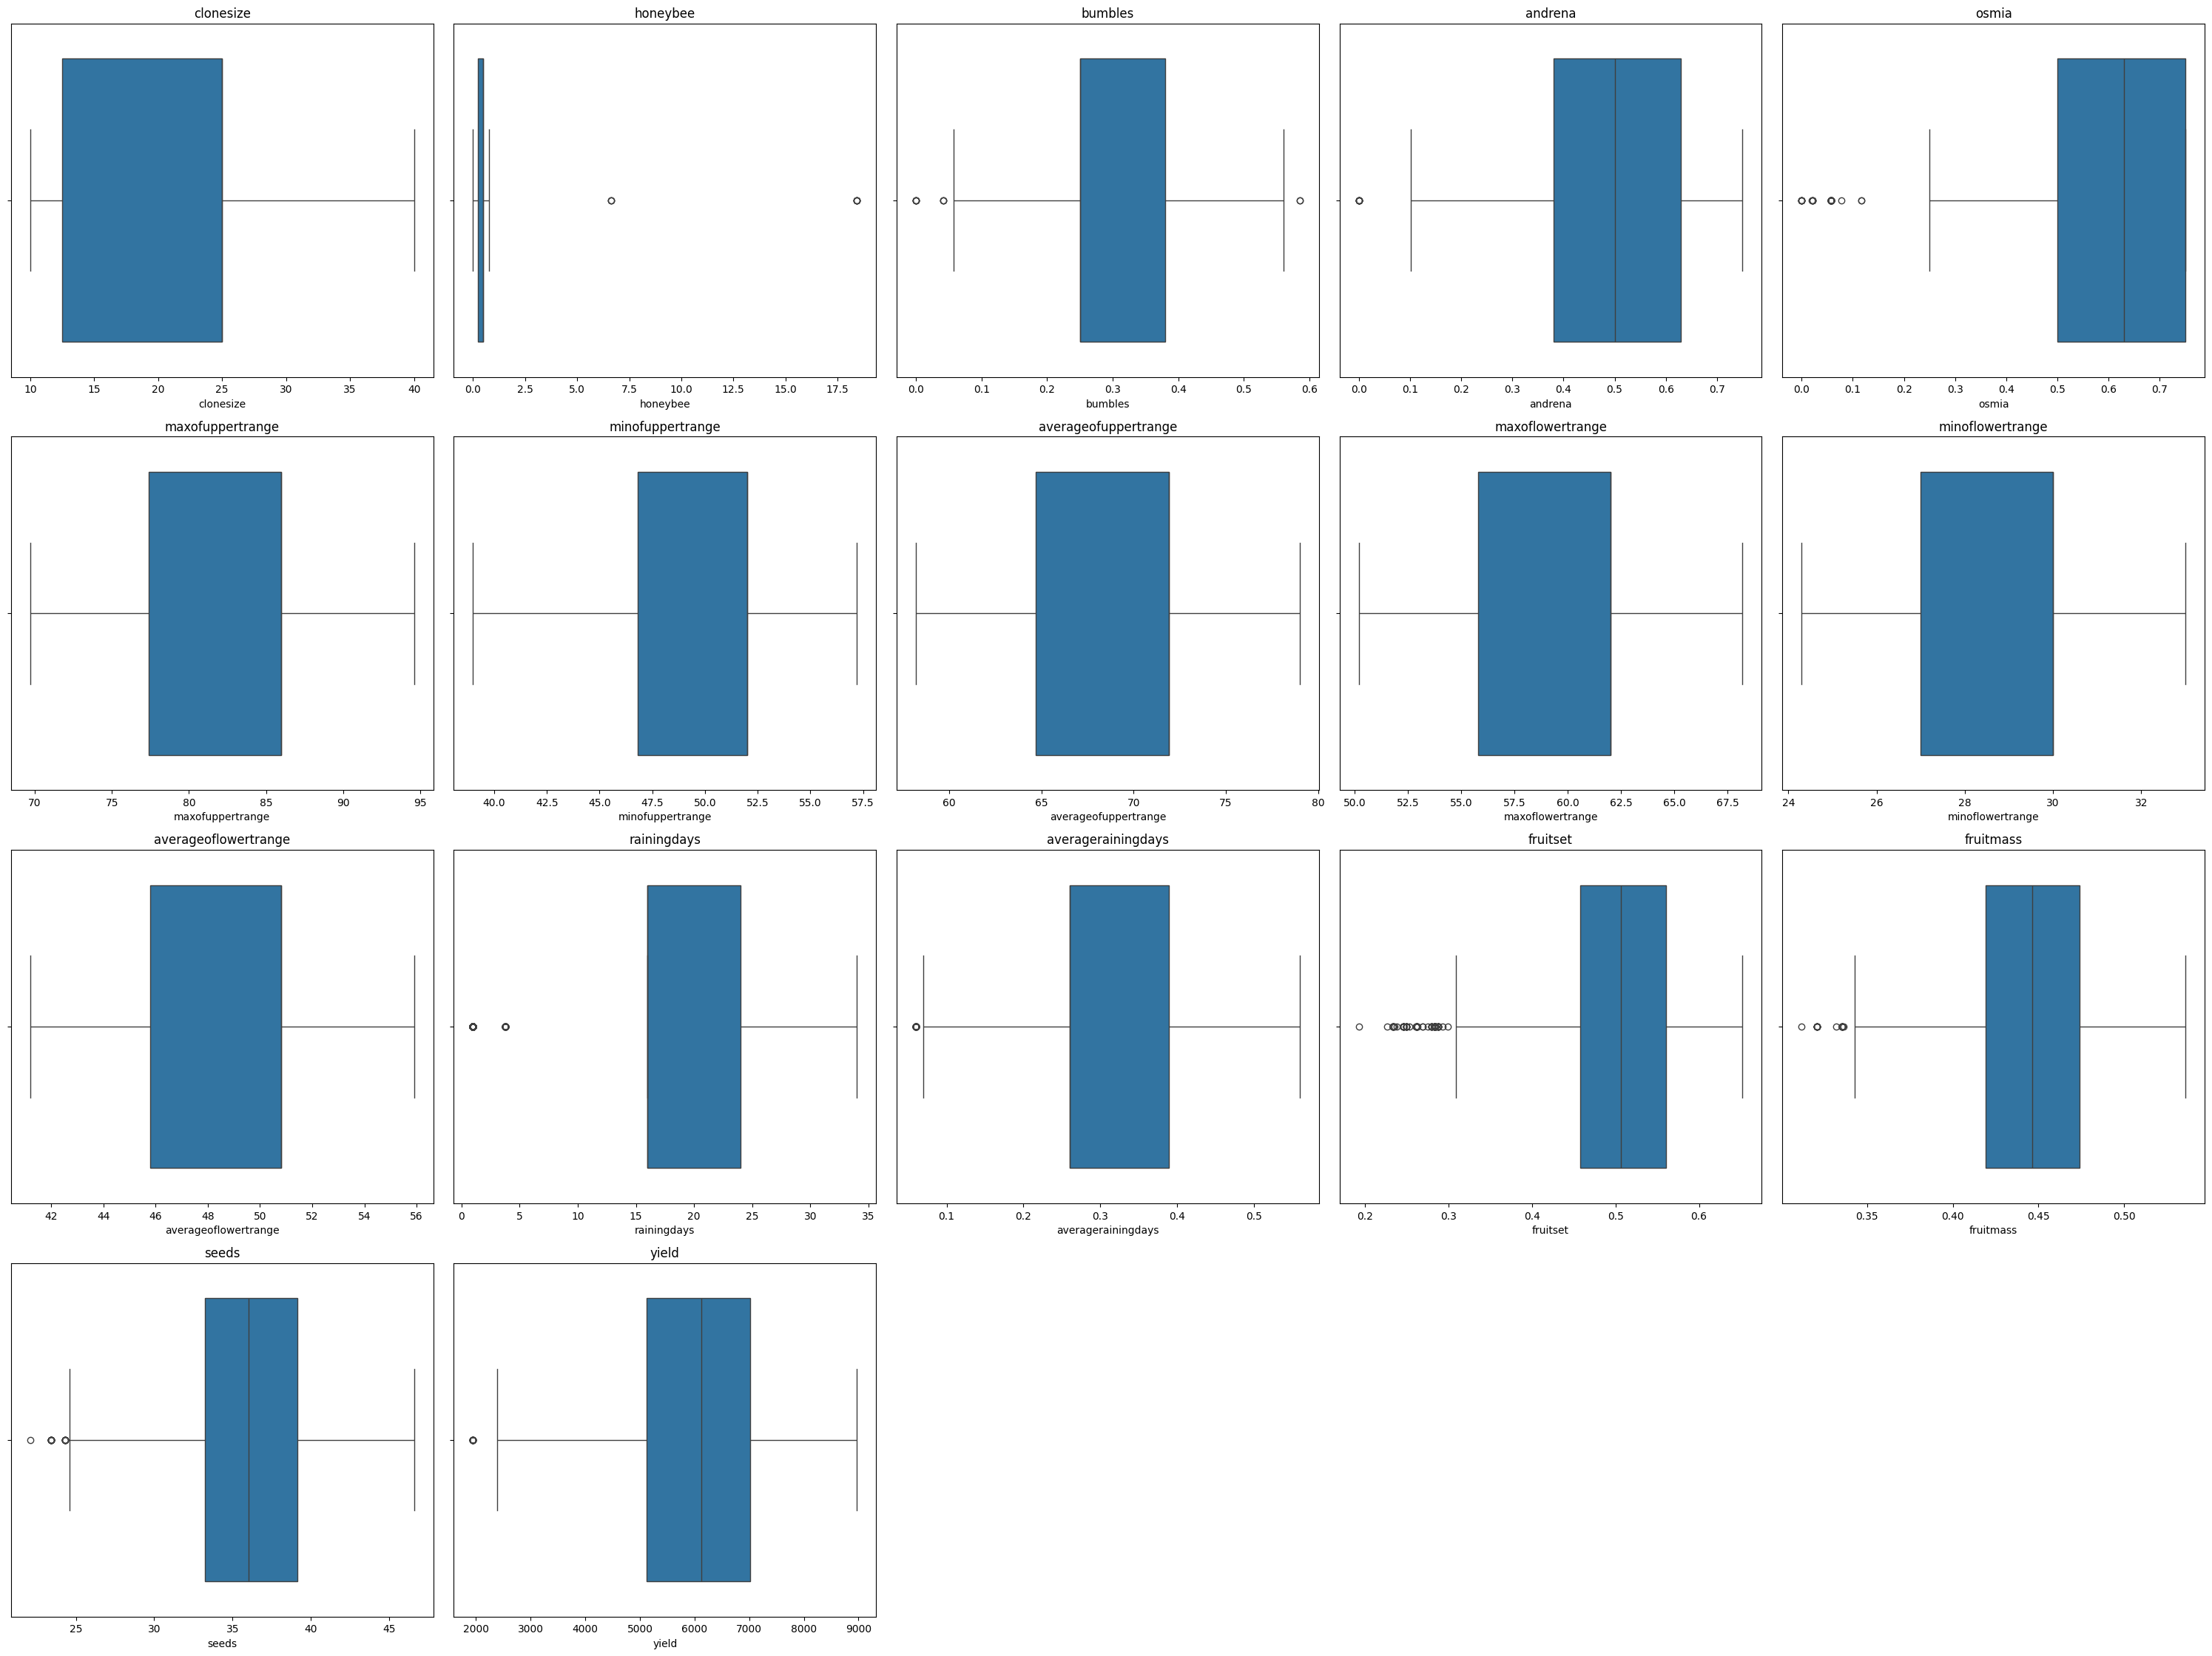

In [14]:
fig = plt.figure(figsize=(30,50))
for i in range(len(train.columns)):
    ax=fig.add_subplot(9, 5, i+1)
    sns.boxplot(x=train.iloc[:, i],ax=ax)
    ax.set_title(train.columns[i])
plt.tight_layout()
plt.show()

In [15]:
bee_cols=['honeybee','bumbles','andrena','osmia']
df_long=train.melt(value_vars=bee_cols,
                   var_name='bee_species',
                   value_name='density')
df_long.head()

,bee_species,density
0,honeybee,0.50
1,honeybee,0.50
2,honeybee,0.25
3,honeybee,0.25
4,honeybee,0.50


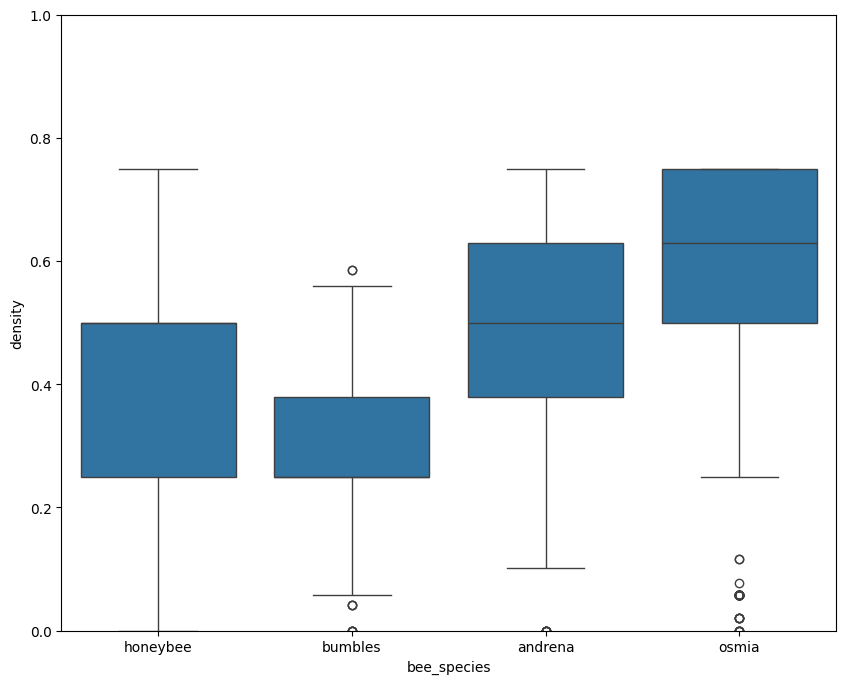

In [16]:
plt.figure(figsize=(10,8))

sns.boxplot(x='bee_species',y='density', data=df_long)
plt.ylim(0,1)



plt.show()

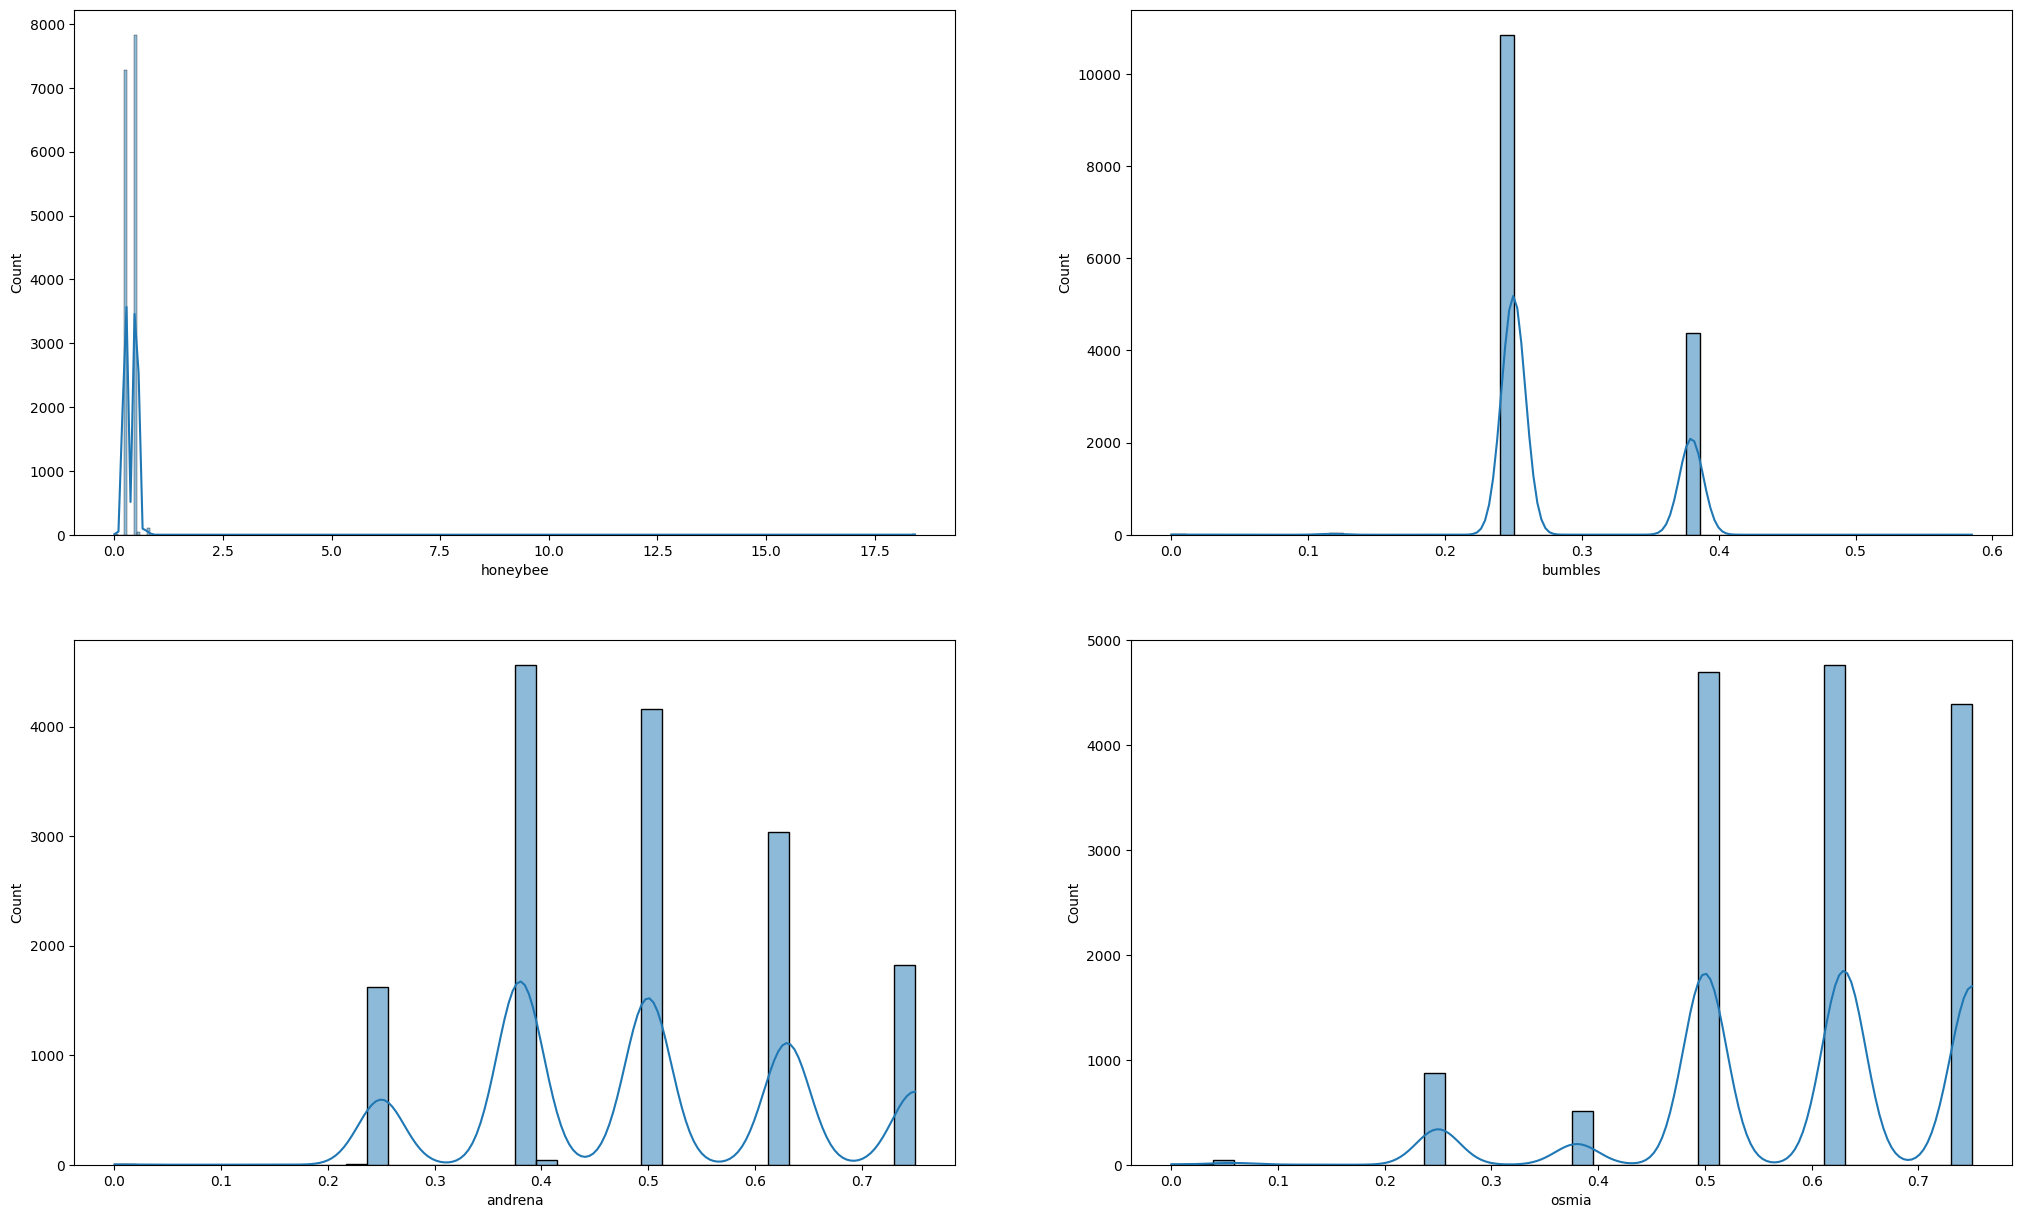

In [17]:
fig, ax=plt.subplots(nrows =2,ncols=2,figsize=(25,15))

sns.histplot(train['honeybee'],kde=True,ax=ax[0,0])
sns.histplot(train['bumbles'],kde=True,ax=ax[0,1])
sns.histplot(train['andrena'],kde=True,ax=ax[1,0])
sns.histplot(train['osmia'],kde=True,ax=ax[1,1])


plt.show()





## Bivariate Analysis

<Figure size 1000x800 with 0 Axes>

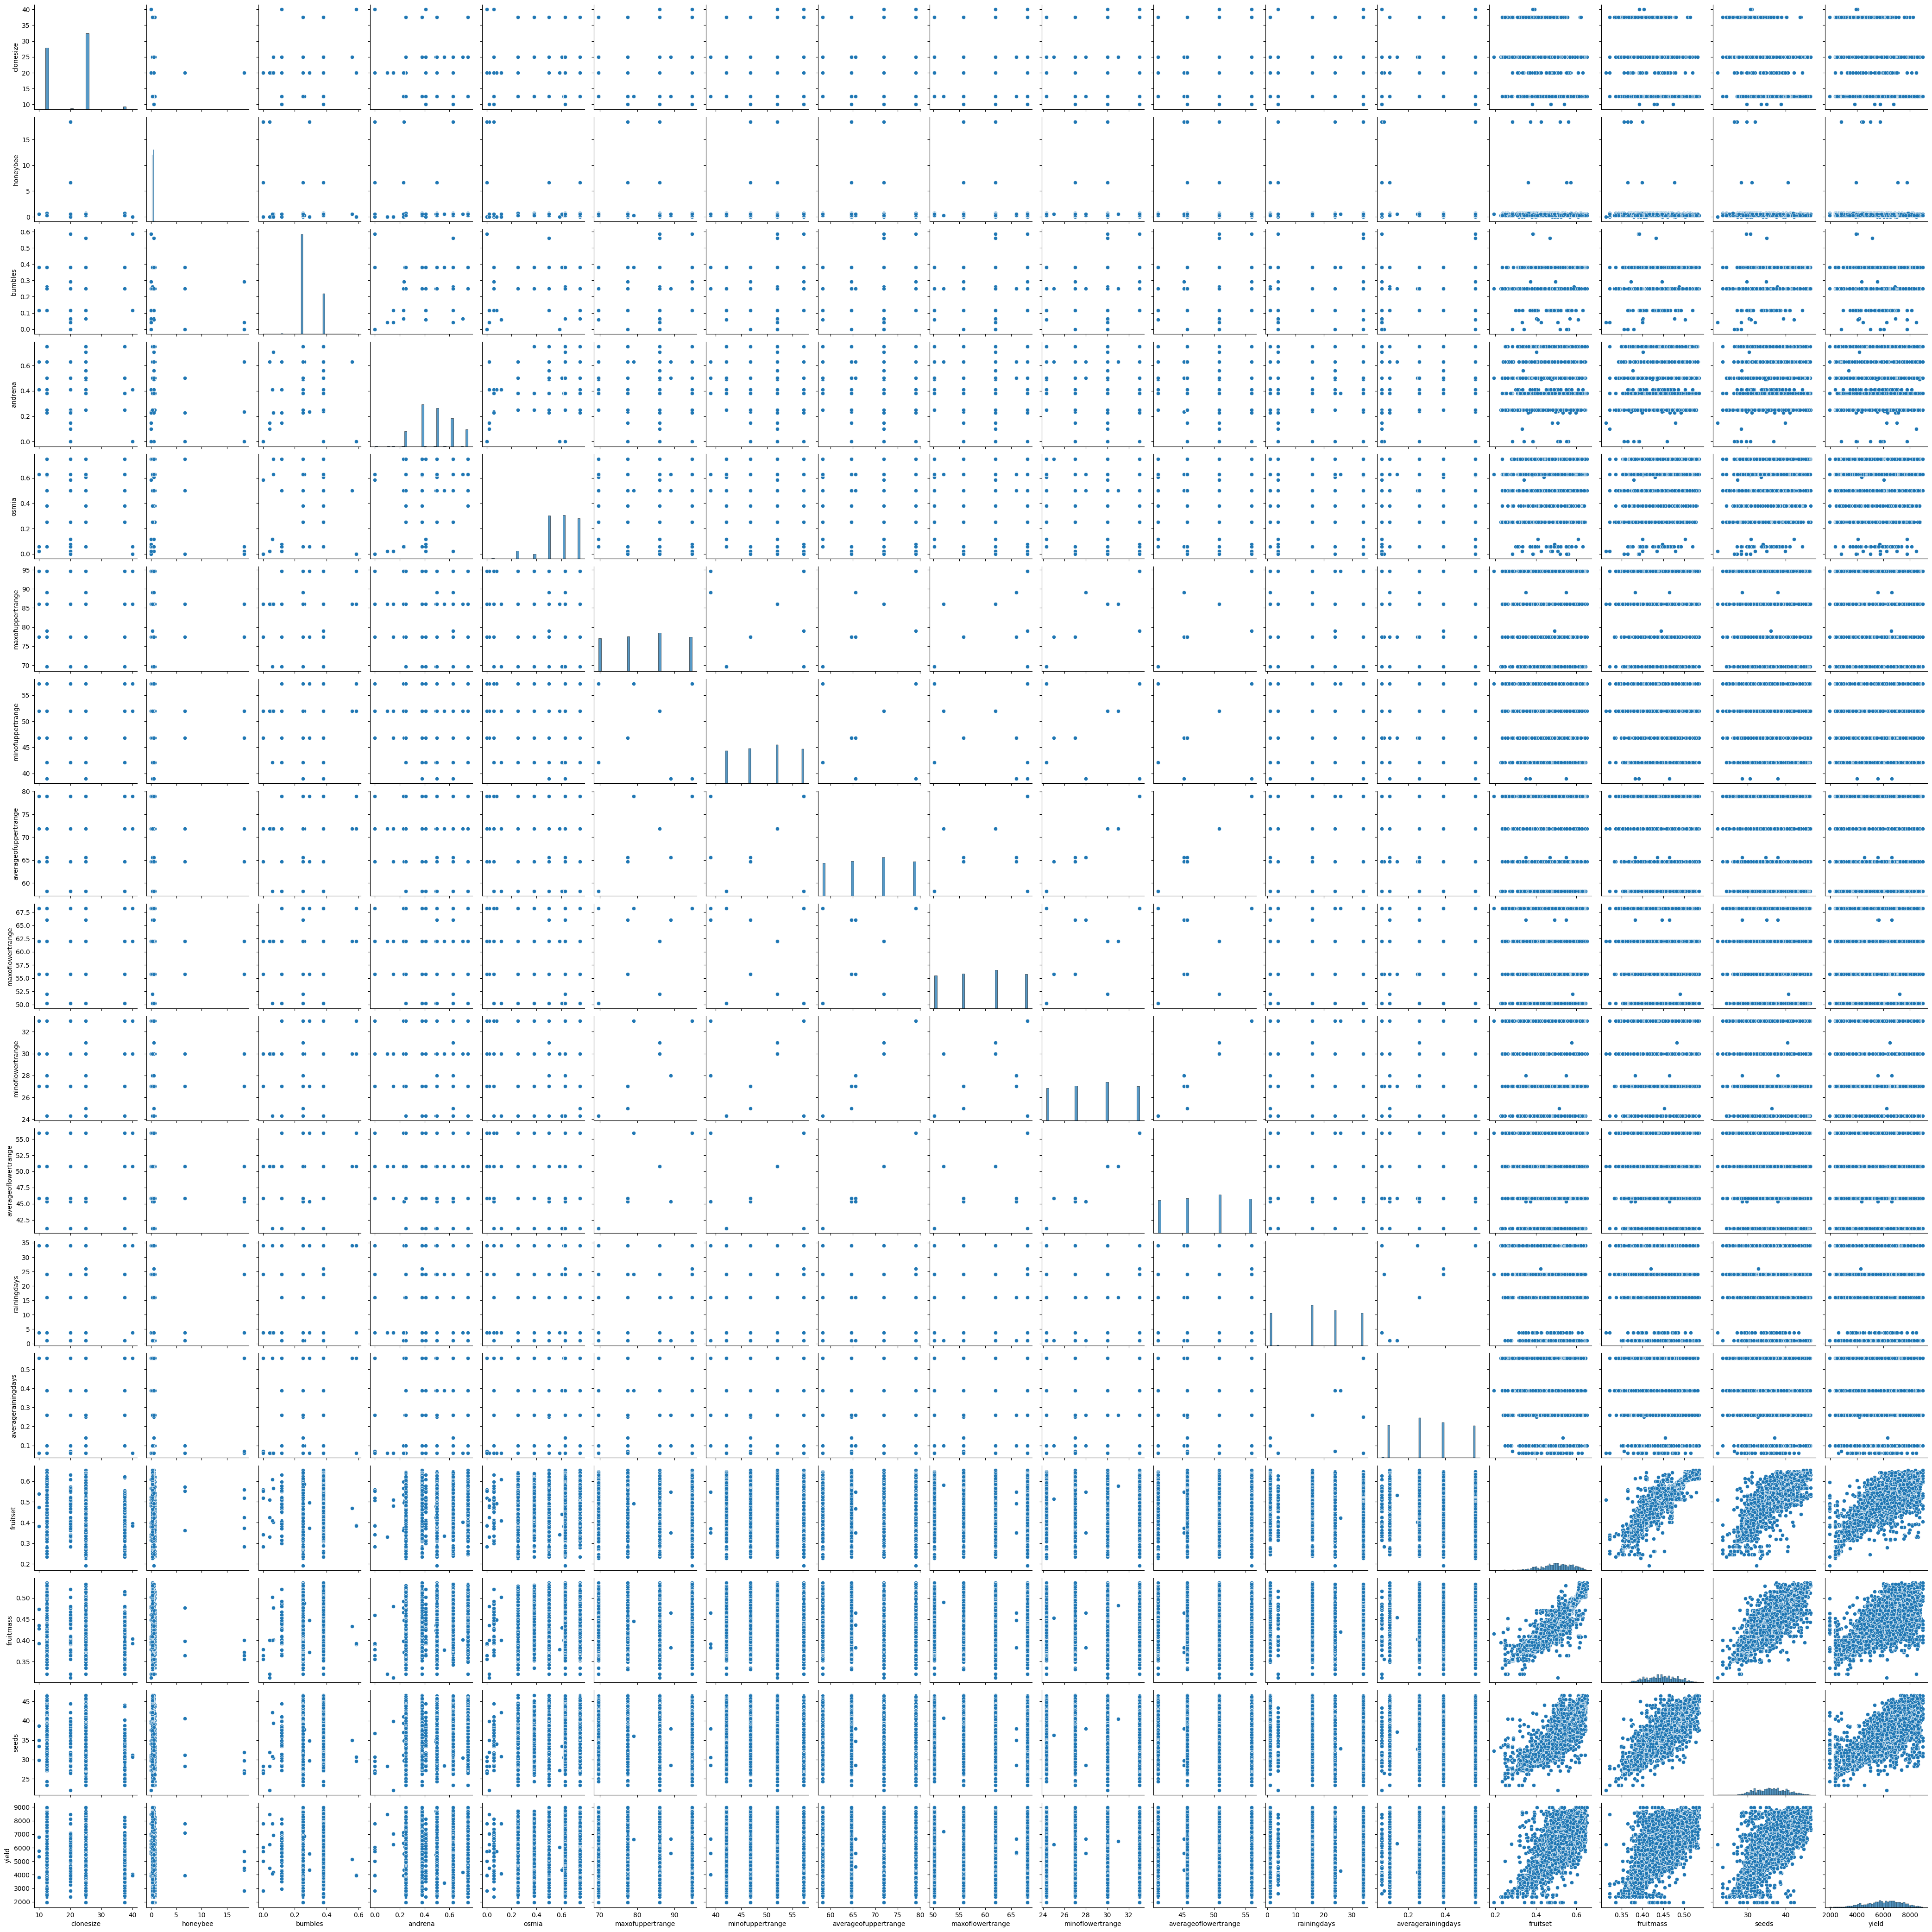

In [18]:
plt.figure(figsize=(10,8))

sns.pairplot(train)

plt.show()

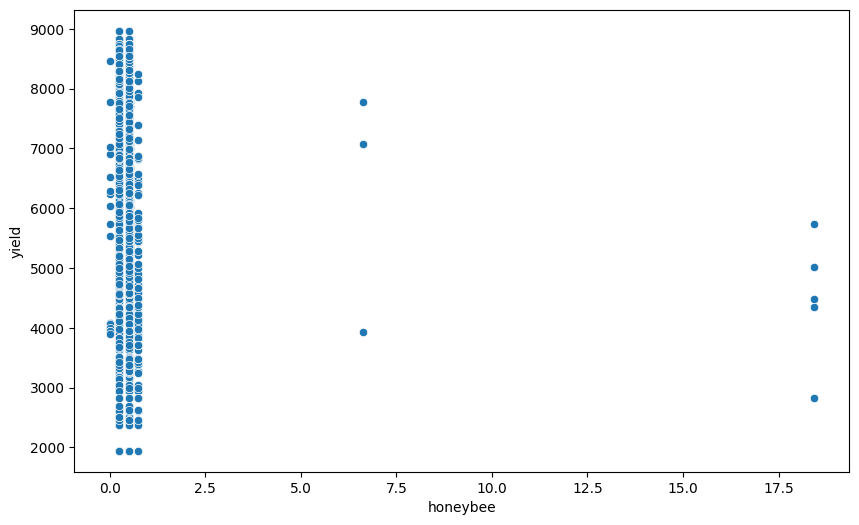

In [19]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=train['honeybee'],y=train['yield'])

plt.show()

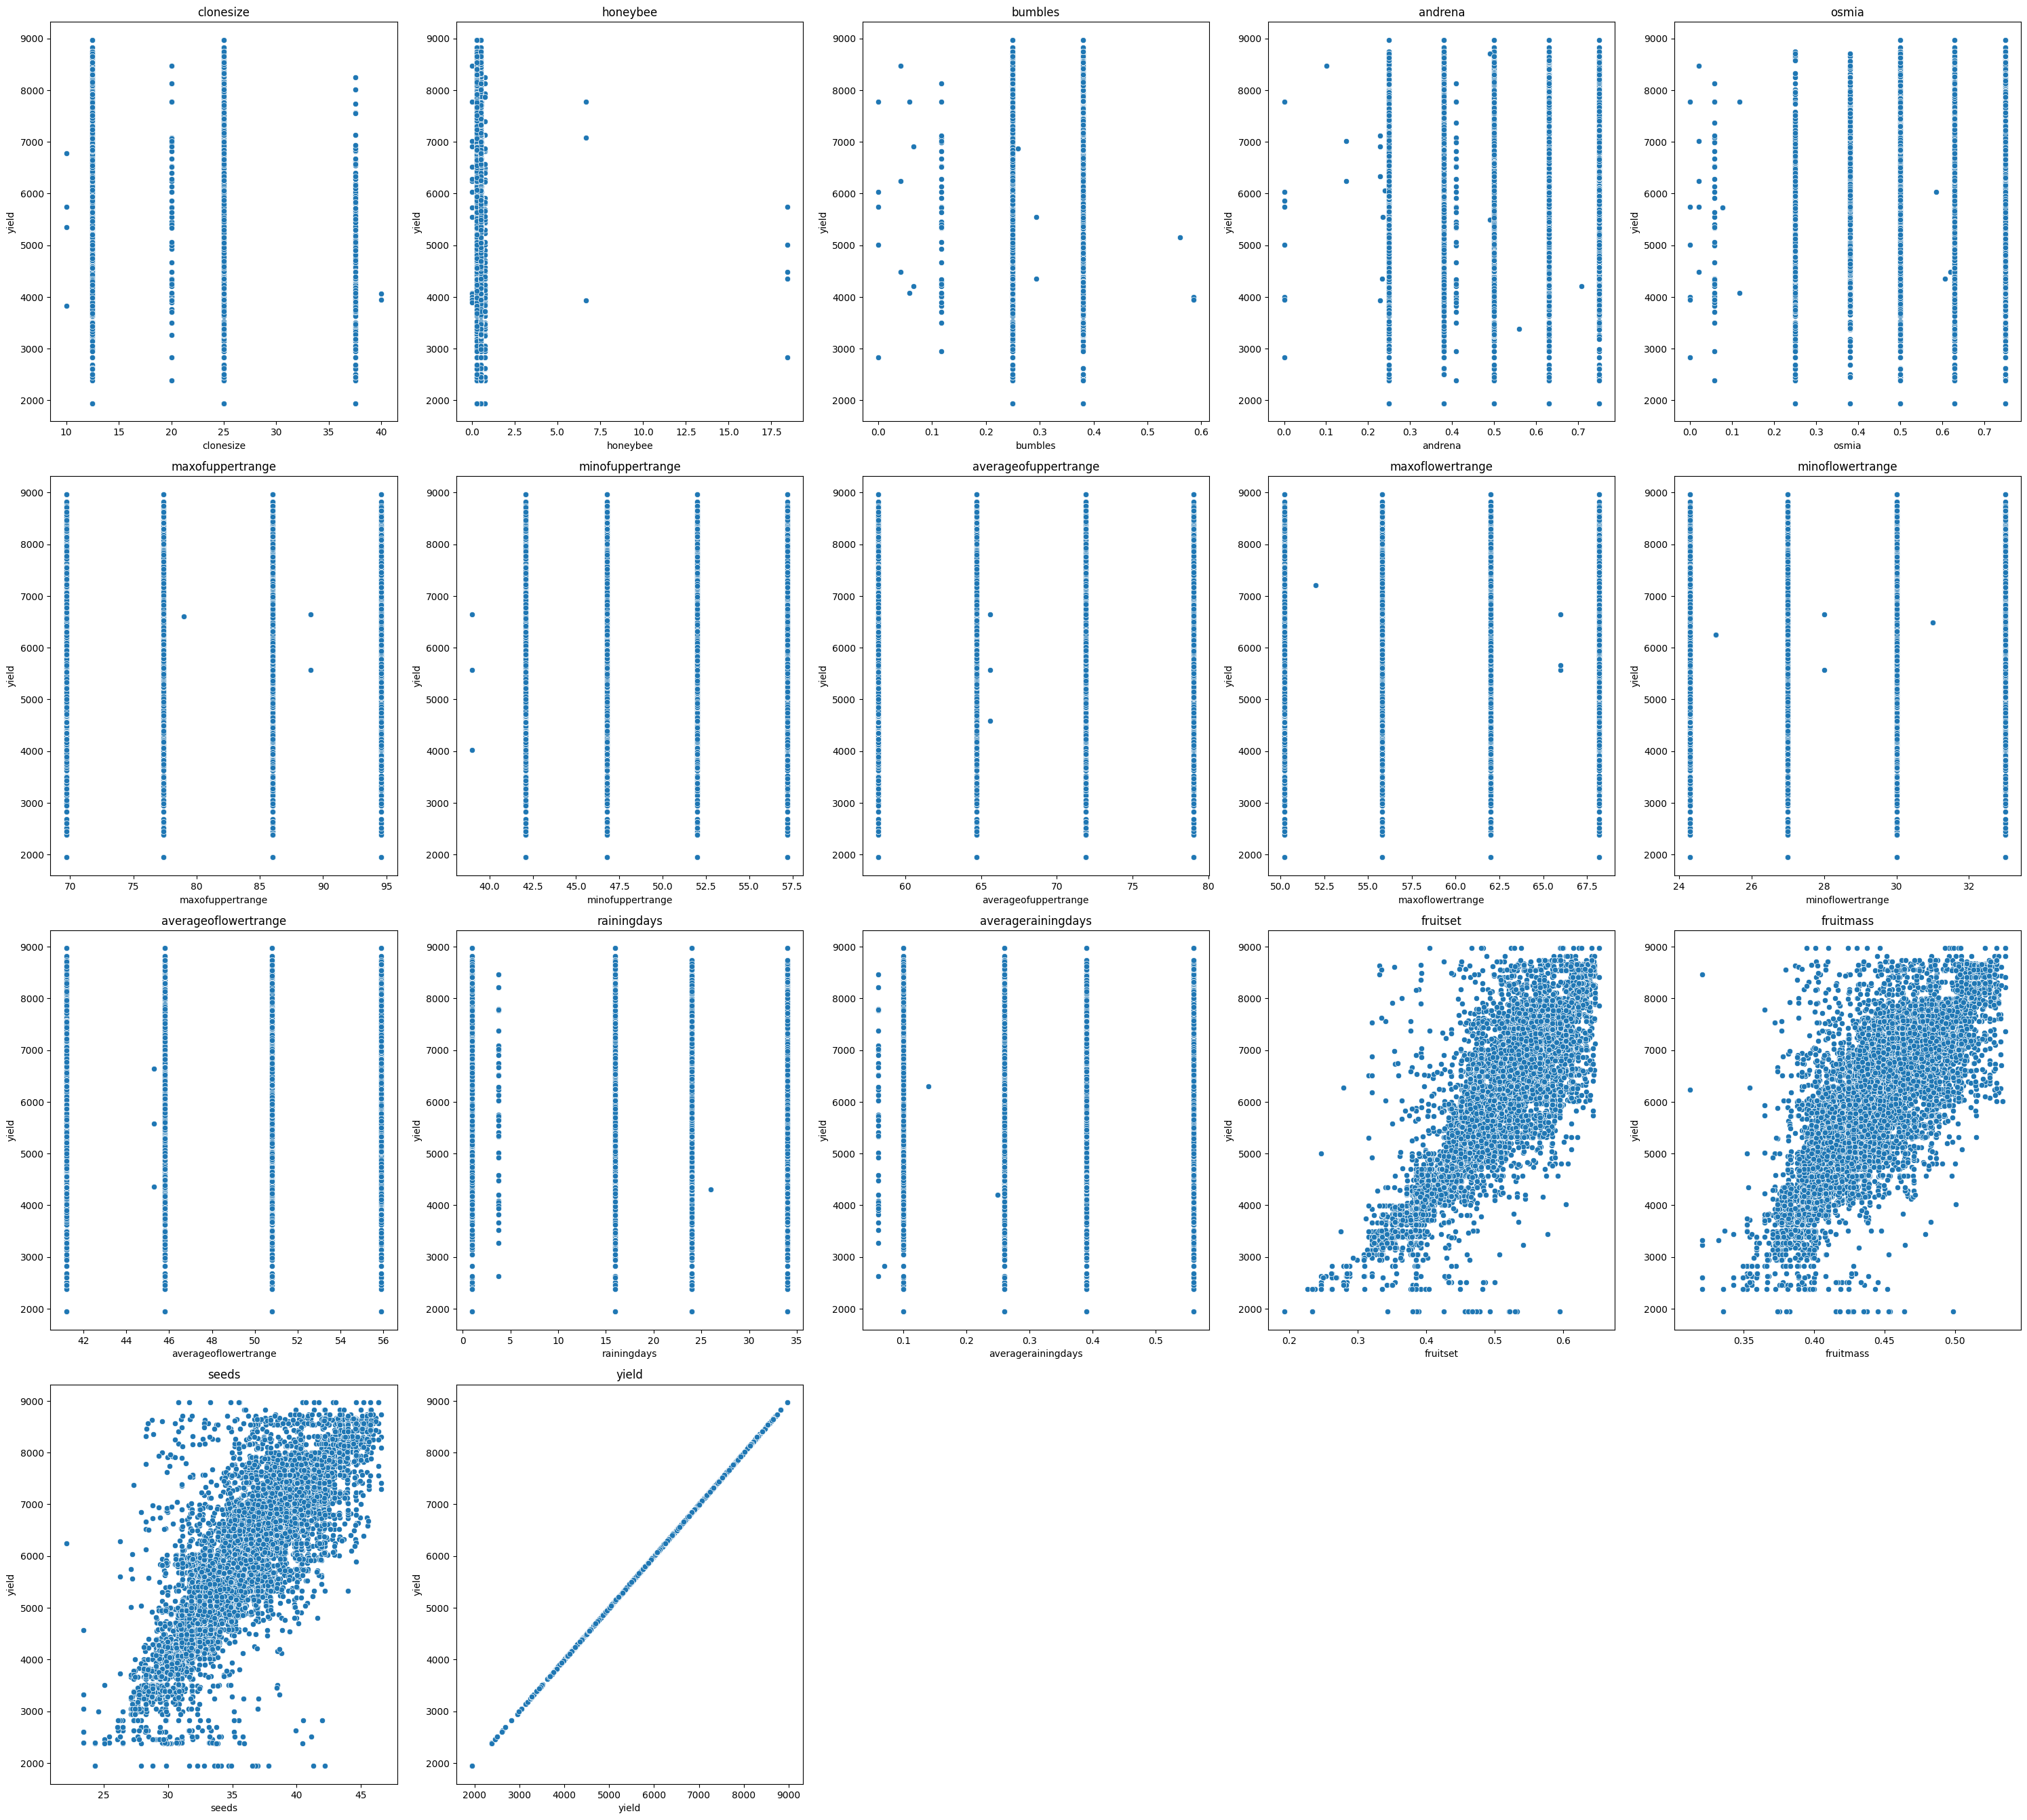

In [20]:
fig = plt.figure(figsize=(30,60))
for i in range(len(train.columns)):
    ax=fig.add_subplot(9, 5, i+1)
    sns.scatterplot(x=train.iloc[:, i],y=train['yield'],ax=ax)
    ax.set_title(train.columns[i])
plt.tight_layout()
plt.show()

## Multivariate Analysis

<Axes: >

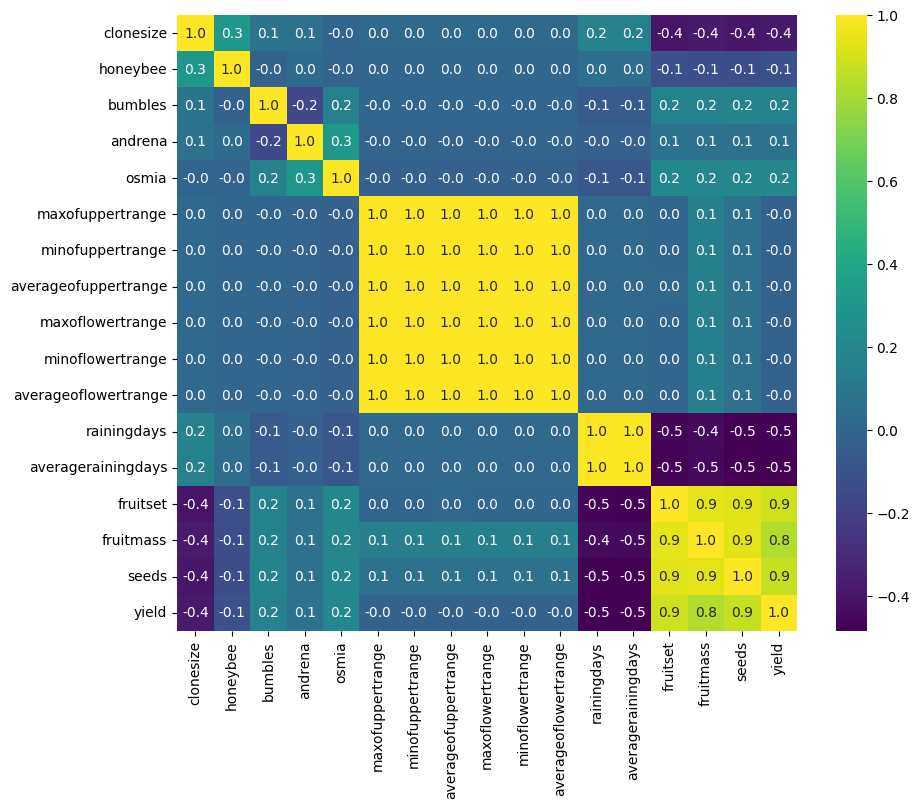

In [21]:
corr=train.corr()
#top_features=
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='viridis',fmt='.1f')

In [ ]:
# stat models library- VIF Variance Inflation Factor

In [22]:
#Univariate Analysis
# looking at the distribution of the yield
# average daily temperatures
# Comparison of the densities of the different bees

#Bivariate Analysis
# daily temperature versus yield 
# rain days versus yield
# fruit mass, fruit set, seed versus yield

# Multivariate Analysis
# Correlation matrix- look out for multicollinearity

Since all our data is already numerical, it is ready for modelling.

# Model Training

In [30]:
#import dependencies
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PolynomialFeatures,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
#from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_squared_error,r2_score, mean_absolute_error

In [24]:
## Data Separation into the X and y matrices
X = train.drop('yield',axis=1)
y =train['yield']

In [27]:
# Scaling 
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [41]:
# separate training and test sets 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12231, 16) (3058, 16) (12231,) (3058,)


In [ ]:
#now we can train our model, starting with a simple linear regression
model=LinearRegression() #RidgeRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
#now let us test the model on our  test data
y_pred = model.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))

Test R²: 0.8109952801985604
Test MSE: 345164.7032583517


In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)